# Introducción al manejo de datos geográficos

# Clase 1

## Parte 1. Geopandas
### Conceptos básicos

In [1]:
# Importemos numpy y pandas,
import numpy as np
import pandas as pd

In [2]:
# y carguemos el dataframe que construimos durante la introducción
da_completo = pd.read_csv('../data/da_ajustado.csv', index_col=[0])

In [3]:
da_completo

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb
0,C1024FDA,2020,2021,31,2,3,3,9,4,10
1,C1024FDA,2021,2022,32,5,11,1,1,10,4
2,C1171ABM,2020,2021,40,6,12,2,14,2,4
3,C1171ABM,2021,2022,41,1,14,2,4,6,14
4,C1097AAX,2020,2021,43,13,6,1,4,4,15
5,C1097AAX,2021,2022,43,4,3,2,12,7,15


## Ingresando al mundo de los atributos geo

<img align="left" width="500" height="125" src="../imagenes/panda_geometrico.png" style="float: left; padding: 0 15px">
Para ponerlo en términos extremadamente sencillos, podríamos decir que la única diferencia entre pandas y geopandas es la posibilidad de manipular geometrías. Las nociones de Serie y DataFrame sobre las que estuvimos trabajando no desaparecen. Este esquema de manejo de datos (columnas, filas, indexación, etc.) se mantiene, aunque incorporando un conjunto de métodos que sirven para operar exclusivamente sobre el principal atributo de un dato espacial: su `geometría`.

Esta no es otra cosa que una columna más de nuestra tabla de datos, una Serie dentro de un DataFrame...o mejor dicho, una `GeoSerie` de un `GeoDataFrame`. Con ella podremos realizar, de forma muy sencilla, operaciones tales como calcular el área de un polígono, estimar la distancia de un punto a otro o cambiar de un sistema de proyección de coordenadas a otro. 

### GeoSeries de qué? 

Como acabamos de decir, ['Geopandas'](https://geopandas.org/) extiende las funcionalidades de pandas, habiliatando un conjunto de operaciones nuevas sobre **objetos geométricos**. Estas operaciones, espaciales o geométricas, son posible gracias a ['Shapely'](https://shapely.readthedocs.io/en/latest/manual.html), el paquete con el que dispone geopandas para realizar [manipulaciones geométricas](https://geopandas.org/geometric_manipulations.html). 

Los objetos de `Shapely` que componen una GeoSerie son fundamentalmente tres. Puntos, líneas y polígonos. Cada uno de ellos, implementado a partir de una clase propia: *`Point`, `LineString/LinearRing`* y *`Polygon`* respectivamente. También es importante aclarar que `Shapely` cuenta con clases específicas para operar sobre conjuntos o colecciones de cada uno de estos objetos. Así es que también contamos con las clases de tipo *`MultiPoint`, `MultiLineString` y `MultiPloygon`*. 

Cada uno de estos tres objetos se encuentra asociado con un conjunto de puntos en el plano: en su interior, sus límites y por fuera de sí mismo. Veamos un poco qué significa esto para cada uno de ellos. 

> **1. Puntos**

La clase `Point` posee una dimensión topológica de cero. Esto quiere decir, que no contiene puntos en sus conjuntos interiores y exteriores y tampoco en sus límites. En otras palabras, un punto no es más que un par de coordenadas en el espacio. Una latitud y una longitud. 

Para graficarlo, volvamos a nuestro dataframe de desarrollos inmobiliarios. Supongamos ahora, que la ubicación de los desarrollos es un atributo indispensable para nuestro análisis. Ya sea porque se quiere cubrir determinado tipo de demanda o porque, simplemente, se busca que los desarrollos se distribuyan de manera homogénea en el territorio.

Primero, geolocalicemos los desarrollos que construimos en los ejemplos anteriores. Para ello, utilizaremos una librería de Denis Carriere conocida como [`geocoder`](https://geocoder.readthedocs.io/). Esta se caracteriza por compilar distintos servicios de geolocalización tales como Google y OpenStreetMap y disponibilizarlos a partir de queries muy simples. Este paquete ya se encuentra en los requirements, por eso sólo vamos importarlo. Si querés saber un poco más sobre la instalación y aspectos generales de esta librería podes consultar [acá](https://geocoder.readthedocs.io/api.html#install).

In [4]:
# Si tenés una API key podés ir por este camino...
import geocoder

In [5]:
# Construimos una función para obtener las coordenadas geográficas a partir del código postal
def postal_a_latlng(x):
    '''
    Obtiene la latitud y longitud a partir 
    de un código postal.
    ...
    Argumentos:
        x(str): Primera letra y 4 dígitos del código completo.
    Devuelve:
        diccionario: latitud y longitud de la consulta 
    
    '''
    
    api_key = 'Api Key' 
    resultado = geocoder.google('{}, Ciudad de Buenos Aires'.format(x[:5]), 
                                key = api_key,
                                method = 'places')
    
    return {'lat': resultado.lat, 
            'lng': resultado.lng}  

Y ahora, refrescemos un poco lo que vimos en la sección anterior aplicando los métodos que vimos para operar sobre Seried de un DataFrame...

In [6]:
# con map
da_completo['id'].map(postal_a_latlng)

0    {'lat': -34.5873759, 'lng': -58.38717819999999}
1    {'lat': -34.5873759, 'lng': -58.38717819999999}
2           {'lat': -34.6025084, 'lng': -58.4115493}
3           {'lat': -34.6025084, 'lng': -58.4115493}
4           {'lat': -34.6152298, 'lng': -58.3819811}
5           {'lat': -34.6152298, 'lng': -58.3819811}
Name: id, dtype: object

In [7]:
# con apply
da_completo['id'].apply(postal_a_latlng)

0    {'lat': -34.5873759, 'lng': -58.38717819999999}
1    {'lat': -34.5873759, 'lng': -58.38717819999999}
2           {'lat': -34.6025084, 'lng': -58.4115493}
3           {'lat': -34.6025084, 'lng': -58.4115493}
4           {'lat': -34.6152298, 'lng': -58.3819811}
5           {'lat': -34.6152298, 'lng': -58.3819811}
Name: id, dtype: object

In [8]:
# con apply y una función anónima
da_completo['id'].apply(lambda x: postal_a_latlng(x))

0    {'lat': -34.5873759, 'lng': -58.38717819999999}
1    {'lat': -34.5873759, 'lng': -58.38717819999999}
2           {'lat': -34.6025084, 'lng': -58.4115493}
3           {'lat': -34.6025084, 'lng': -58.4115493}
4           {'lat': -34.6152298, 'lng': -58.3819811}
5           {'lat': -34.6152298, 'lng': -58.3819811}
Name: id, dtype: object

In [9]:
# Vayamos con la última opción y llamemos a cada llave de nuestro diccionario.
latitud = da_completo['id'].apply(lambda x: postal_a_latlng(x)['lat'])

In [10]:
latitud

0   -34.587376
1   -34.587376
2   -34.602508
3   -34.602508
4   -34.615230
5   -34.615230
Name: id, dtype: float64

In [11]:
# Ahora sí, ya tenemos la latitud de los desarrollos en nuestro DataFrame.
da_completo['latitud'] = latitud

In [12]:
# Vamos por la longitud.
longitud = da_completo['id'].apply(lambda x: postal_a_latlng(x)['lng'])

In [13]:
longitud

0   -58.387178
1   -58.387178
2   -58.411549
3   -58.411549
4   -58.381981
5   -58.381981
Name: id, dtype: float64

In [14]:
# Listo, ya tenemos nuestros desarrollos con sus respectivas coordenadas.
da_completo['longitud'] = longitud

In [15]:
da_completo

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,latitud,longitud
0,C1024FDA,2020,2021,31,2,3,3,9,4,10,-34.587376,-58.387178
1,C1024FDA,2021,2022,32,5,11,1,1,10,4,-34.587376,-58.387178
2,C1171ABM,2020,2021,40,6,12,2,14,2,4,-34.602508,-58.411549
3,C1171ABM,2021,2022,41,1,14,2,4,6,14,-34.602508,-58.411549
4,C1097AAX,2020,2021,43,13,6,1,4,4,15,-34.615230,-58.381981
5,C1097AAX,2021,2022,43,4,3,2,12,7,15,-34.615230,-58.381981


Si no tenés una API key, **acá tenés el dataframe con sus coordenadas geográficas**. Y si querés investigar cómo gestionar una, acá algo de [documentación](https://developers.google.com/maps/documentation/geocoding/start?hl=es-419&utm_source=google&utm_medium=cpc&utm_campaign=FY18-Q2-global-demandgen-paidsearchonnetworkhouseads-cs-maps_contactsal_saf&utm_content=text-ad-none-none-DEV_c-CRE_436364850901-ADGP_Hybrid+%7C+AW+SEM+%7C+SKWS+~+Places+%7C+BMM+%7C+Geocoding+API-KWID_43700051583007815-kwd-301485308042-userloc_1000073&utm_term=KW_%2Bgeocoding%20%2Bapi-ST_%2Bgeocoding+%2Bapi&gclid=Cj0KCQjwhIP6BRCMARIsALu9LfnX1Hyo4k_frqSDsSNh3UmkEEeJ4d8S02SLjZNo65LmdSFfu4ZH76saAog5EALw_wcB) para que investigues cómo hacerlo.

In [16]:
#da_completo.to_csv('../data/da_completo.csv')

In [17]:
# DataFrame de desarrollos inmobiliarios con sus coordenadas geográficas
#da_completo = pd.read_csv('data/da_completo.csv')

In [18]:
#da_completo.drop(columns='Unnamed: 0', inplace=True)

Ahora, tenemos que convertir nuestro DataFrame en un GeoDataFrame de puntos. A continuación veremos que no hay una sola forma de hacerlo. 

In [19]:
# empecemos por importar geopandas
import geopandas as gpd
print('geopandas version:' + gpd.__version__)

geopandas version:0.7.0


In [20]:
# así se puede explorar cómo utilizar clases o métodos. Otra, es el shortcut 'shift+tab*2' dentro del paréntesis.
#help(gpd.GeoDataFrame())

In [21]:
# creemos el geodataframe
gdf = gpd.GeoDataFrame(da_completo, geometry=gpd.points_from_xy(da_completo.longitud, 
                                                                da_completo.latitud))

In [22]:
# ya podemos ver nuestra columns de geometry
gdf

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,latitud,longitud,geometry
0,C1024FDA,2020,2021,31,2,3,3,9,4,10,-34.587376,-58.387178,POINT (-58.38718 -34.58738)
1,C1024FDA,2021,2022,32,5,11,1,1,10,4,-34.587376,-58.387178,POINT (-58.38718 -34.58738)
2,C1171ABM,2020,2021,40,6,12,2,14,2,4,-34.602508,-58.411549,POINT (-58.41155 -34.60251)
3,C1171ABM,2021,2022,41,1,14,2,4,6,14,-34.602508,-58.411549,POINT (-58.41155 -34.60251)
4,C1097AAX,2020,2021,43,13,6,1,4,4,15,-34.615230,-58.381981,POINT (-58.38198 -34.61523)
5,C1097AAX,2021,2022,43,4,3,2,12,7,15,-34.615230,-58.381981,POINT (-58.38198 -34.61523)


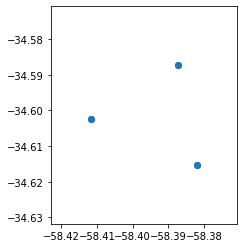

In [23]:
# El obtejo GeoDataFrame cuenta con un método de ploteo. Así se hace bastante más ágil su visualización!
gdf.plot();

In [24]:
# Veamos cuál es nuestro sistema de coordenadas de referencia. Por el momento no definimos ninguno!
print(gdf.crs)

None


Lo que básicamente hace `.point_from_xy()` es crear una lista de objetos `Shapely` de clase `Point` a partir de las coordenadas geográficas que le pasamos para crear la geometría. Lo mismo obtendríamos si aplicaramos el método `Point` de `Shapely` a partir de una lista por comprensión, de esta manera:

In [25]:
# importamos el objeto Point de Shapely
from shapely.geometry import Point

In [26]:
# desempacamos lo que sucedía dentro de .point_from_xy() usando una lista por comprensión y vemos que...
[Point(x, y) for x, y in zip(da_completo.longitud, da_completo.latitud)]

Esto equivaldría al camino largo, por decirlo de alguna forma. Veamos cómo lo integramos para que nuestro DataFrame se convierta en Geo.

In [27]:
# Creamos la columna geometría y la agregamos al dataframe
geometría = [Point(x, y) for x,y in zip(da_completo.longitud, da_completo.latitud)]

In [28]:
# Definimos el sistema de coordenadas
crs="EPSG:4326"

# Creamos el GeoDataFrame
gda_completo = gpd.GeoDataFrame(da_completo, crs=crs, geometry=geometría)

In [29]:
gda_completo

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,latitud,longitud,geometry
0,C1024FDA,2020,2021,31,2,3,3,9,4,10,-34.587376,-58.387178,POINT (-58.38718 -34.58738)
1,C1024FDA,2021,2022,32,5,11,1,1,10,4,-34.587376,-58.387178,POINT (-58.38718 -34.58738)
2,C1171ABM,2020,2021,40,6,12,2,14,2,4,-34.602508,-58.411549,POINT (-58.41155 -34.60251)
3,C1171ABM,2021,2022,41,1,14,2,4,6,14,-34.602508,-58.411549,POINT (-58.41155 -34.60251)
4,C1097AAX,2020,2021,43,13,6,1,4,4,15,-34.615230,-58.381981,POINT (-58.38198 -34.61523)
5,C1097AAX,2021,2022,43,4,3,2,12,7,15,-34.615230,-58.381981,POINT (-58.38198 -34.61523)


Hagamos un breve paréntesis. No les parece que ahora cobra algo más de sentido lo que dijimos antes? Que los datos espaciales no dejan de ser `datos`? De ahí es que todos los métodos que vimos antes nos pueden ayudar a hacer tareas como las que vimos arriba de manera mucho más ágil y sencilla. Veamos un ejemplo más de esto...

In [30]:
# Si tenías una API key, estas variables ya las definiste más arriba.
latitud, longitud = da_completo.latitud, da_completo.longitud

# Imginemos que tenemos una columna única de coordenadas. 
coordenadas = zip(latitud, longitud)

In [31]:
# Borremos las columnas de latitud y longitud de nuestro gdf.
da_completo.drop(columns=['latitud','longitud'], inplace=True)

In [32]:
# Armemos una lista de tuplas con nuestras latitudes y longitudes para verlo en detalle...
list(coordenadas)

[(-34.5873759, -58.38717819999999),
 (-34.5873759, -58.38717819999999),
 (-34.6025084, -58.4115493),
 (-34.6025084, -58.4115493),
 (-34.6152298, -58.3819811),
 (-34.6152298, -58.3819811)]

In [33]:
# recuperemos nuestro GeoDataFrame anterior y seleccionemos todas las filas y sólo algunas columnas
gdf = gdf.iloc[:,:10] 

In [34]:
# ... y creemos una única columna de coordenadas.
gdf['coordenadas'] = list(zip(latitud,longitud))

In [35]:
gdf

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,coordenadas
0,C1024FDA,2020,2021,31,2,3,3,9,4,10,"(-34.5873759, -58.38717819999999)"
1,C1024FDA,2021,2022,32,5,11,1,1,10,4,"(-34.5873759, -58.38717819999999)"
2,C1171ABM,2020,2021,40,6,12,2,14,2,4,"(-34.6025084, -58.4115493)"
3,C1171ABM,2021,2022,41,1,14,2,4,6,14,"(-34.6025084, -58.4115493)"
4,C1097AAX,2020,2021,43,13,6,1,4,4,15,"(-34.6152298, -58.3819811)"
5,C1097AAX,2021,2022,43,4,3,2,12,7,15,"(-34.6152298, -58.3819811)"


In [36]:
gdf['coordenadas'].map(Point)

0    POINT (-34.5873759 -58.38717819999999)
1    POINT (-34.5873759 -58.38717819999999)
2           POINT (-34.6025084 -58.4115493)
3           POINT (-34.6025084 -58.4115493)
4           POINT (-34.6152298 -58.3819811)
5           POINT (-34.6152298 -58.3819811)
Name: coordenadas, dtype: object

In [37]:
# Ahora, escriban ustedes cómo lo harían con apply y con una función anónima. Les dejo una pista...
# gdf['coordenadas'].apply(...)

In [38]:
# Crea tu columna de geometría por el camino que más te guste.
gdf['geometría'] = gdf['coordenadas'].map(Point)

In [39]:
# Borremos las columnas que ya no sirven
gdf.drop(columns = ['coordenadas'], inplace=True)

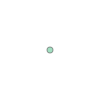

In [40]:
# Y acá nuestro primer objeto Shapely de tipo Point. Vemos que se accede de igual forma que a una fila normal.
gdf['geometría'][0]

In [41]:
# Y que tiene atributos propios como una latitud
gdf['geometría'][0].y

-58.38717819999999

In [42]:
# ... y una longitud
gdf['geometría'][0].x

-34.5873759

Antes, dejamos pasar por alto algo que es extremadamente importante en el mundo Geo. Recuerdan que cuando agregamos nuestra columna de geometrías por primera vez, mencionamos algo que se llama `sistema de coordenadas de referencia` o `crs`(coordinate reference system, porque lo usamos en inglés). Antes de seguir avanzando, es importante que nos tomemos unos minutos para entender brevemente de qué se trata eso.

### Proyecciones cartográficas

Un mapa es, básicamente, una representación de la Tierra en superficie plana. Para poder establecer esta correspondencia, es que existen los sistemas de proyección cartográfica. Para traducir en un plano una superficie que sigue una forma esférica o elipsoidal. Y para la cual, resulta indispensable llevar a cabo algún tipo de transformación. Empecemos por ver en qué proyección se encuentra nuestro dataframe de desarrollos anuales.

In [43]:
# Se acuerdan que definimos un '4326'? El método 'crs' nos permite acceder a la proyección de nuestro objeto.
gda_completo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Existen distintas maneras de ajustar un elipsoide a un plano. Aunque ninguna de ellas sin generar algún tipo de distorsión en la forma que buscamos adaptar. También por eso es que existen distintas proyecciones. Porque cada una conserva mejor cierto tipo de propiedad antes que otra. Lo que significa que alguna pueda resultar mejor según el lugar y la transformación que deba sufrir el globo para representarlo. Tal es así que algunos lugares desarrollan sus propias proyecciones con los fines de aminorar distorsiones en ángulos, distancias, etc..   

Una proyección bastante común es la que se conoce como cilíndrica. Esta lleva los meridianos y los paralelos a un cilindro tangente al ecuador del globo. Sin dudas, la más conocida es la proyección `Mercator`. Esta dispone los meridianos en líneas rectas verticales y los paralelos en líneas rectas horizontales. Ambos perpendiculares entre sí, conformando un sistema de coordenadas de tipo cartesiano. Al ser tangente al ecuador deforma las distancias entre los meridianos, aumentando su ancho real cada vez más a medida que se acerca a los polos (razón por la que no suele ser muy empleada en mapas de latitudes extremas).

![ARTMERCATOR](../imagenes/mercator.jpeg)

**WARNING**: Esta sección no pretende ahondar mucho más en los sistemas de coordenadas de referencia. Simplemente sobrevolaremos sobre aquellas áreas que nos permitan resolver lo meramente práctico y entender lo fundamental. Si te interesa ir un poco más allá, esta [documentación](https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/coordinate_reference_systems.html) es un buen punto de inicio para completar conceptos que no abordaremos en este notebook.

Además de `Mercator` otra proyección cilíndrica es la `Tranverse Mercator` o UTM (de Universal). Este sistema, se caracteriza por apoyar el cilindro de proyección sobre el meridiano (en lugar del ecuador). Una variación de este sistema es el que se utiliza en nuestro territorio nacional: la proyección `Gauss – Krüger`. Esta es una de las reconocidas y utilizadas por el Instituto Geográfico Nacional - IGN. Podés consultar algo más de información en su [web](https://www.ign.gob.ar/NuestrasActividades/ProduccionCartografica/sistemas-de-proyeccion).

![NORMAL](../imagenes/mercator_normal.png)

![NORMAL](../imagenes/mercator_t.png)

Este sistema de proyección divide a la [Argentina en 7 fajas](https://gist.github.com/jkutianski/6532516#file-readme-md) meridianas numeradas de oeste a este. Cada faja de la grilla Gauss-Krüger mide 3° de ancho (longitud) por 34o de largo (latitud) y tiene como propio origen la intersección del Polo Sur con el meridiano central de cada faja. Con el objeto de evitar coordenadas
negativas, se le asigna al meridiano central de cada faja el valor arbitrario de 500.000 metros y al Polo Sur el valor cero metros.

<tr>
    <td> <img src="../imagenes/gaussKrugerFajas.jpg" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="../imagenes/fajas_por_provincia.png" alt="Drawing" style="width: 500px;"/> </td>
</tr

Si querés explorar un poco más sobre el formato de coordenadas de la Ciudad de Buenos Aires, acá dejamos algo de [documentación](https://recursos-data.buenosaires.gob.ar/ckan2/proyecciones-gkba.pdf) sobre [SR-ORG:7124: Gauss-Kruger Bs.As.](http://spatialreference.org/ref/sr-org/7124/). 

In [44]:
argentina = gpd.read_file('../carto/provincia.shp')

Este archivo que acabamos de cargar se conoce como `shapefile`, algo ampliamente utilizado en el mundo de los SIG de escritorio como `QGIS` y `Arcgis`. Es una archivo de datos espaciales desarrollado por la compañía ESRI y está compuesto, entre otras tantas extensiones, por una lista de vértices de la forma (o `.shp`), una base de datos (o `.dbf`) y una proyección (o `.prj`) - acá dejamos una [descripción más completa](https://www.loc.gov/preservation/digital/formats/fdd/fdd000280.shtml). Así como un `shapefile` tiene un archivo `.prj` para definir su proyección, uno de los atributos principales de un GeoDataFrame es el `crs` o sistema de coordenadas en el que está proyectado. De esto dependerán las unidades en las que hagamos los distintos tipos de operaciones y también la forma en la que se plotearán nuestros resultados.

In [45]:
# veamos el CRS de nuestro shape
argentina.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

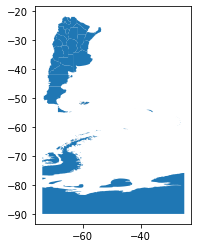

In [46]:
# cómo se ve en 4326? Notan cómo está menos estilizado - o más aplanado?
argentina.plot();

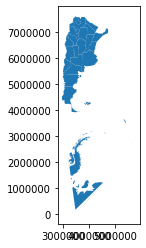

In [47]:
# Ahora redefinamos la proyección. La faja 3 es la que se usa para plotear todo el país...
argentina.to_crs('epsg:22183').plot();

In [48]:
# También podemos redefinir la proyección así
argentina.crs = 22183

In [49]:
argentina.crs

<Projected CRS: EPSG:22183>
Name: POSGAR 94 / Argentina 3
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Argentina - 67.5°W to 64.5°W onshore
- bounds: (-67.5, -55.11, -64.49, -21.78)
Coordinate Operation:
- name: Argentina zone 3
- method: Transverse Mercator
Datum: Posiciones Geodesicas Argentinas 1994
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
# Otra manera de redefinir nuestro CRS, con el objeto CRS de pyproj
from pyproj import CRS

In [51]:
# volvamos a WGS84
argentina.crs = CRS(4326)

In [52]:
CRS(argentina.crs)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Pero qué es esto de `WGS` y `EPSG`? World Geodesic System es, como indican sus siglas en inglés, un sistema de referencia global. Fue desarrollado en la década de los ochenta por la Agencia de Defensa de los Estados Unidos y es ampliamente utilizado en todo el mundo. En Argentina, también se utiliza la Red Geodésica Nacional [POSGAR](https://www.ign.gob.ar/NuestrasActividades/Geodesia/Introduccion). Esto es, un [sistema de referencia local](https://ramsac.ign.gob.ar/posgar07_pg_web/documentos/Informe_sobre_codigos_oficiales_EPSG.pdf).  Y dado que cada país o región puede tener el propio es que existen estandarizaciones como la que disponibiliza la [EPSG](http://www.epsg.org/), una organización que nuclea y distribuye codificaciones para identificar y trabajar con distintos sistemas de referencia.

Detengámonos un poco más acá. Es importante aclarar que la release de geopandas con la que estamos trabajando en este notebook es la `v0.7.0`. Respecto de las [anteriores](https://github.com/geopandas/geopandas/releases), un cambio importante que se ha incluído en esta es que ahora se utiliza un nuevo tipo de objeto para trabajar con el CRS. Esto significa que la sintáxis para definir el sistema de coordenadas de referencia es algo diferente. Veamos un ejemplo para ilustrarlo...

In [53]:
# retomemos nuestro geodataframe de desarrollos y definamos el CRS a partir de un diccionario.
gda_completo.crs = {'init': 'epsg:4326'}

/home/federico/CoDeAr/curso-python-data/Clase 7/venv/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [54]:
gda_completo.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Si le prestamos atención al warning, la forma de definir el CRS difiere respecto de las releases anteriores. Y esto sucede básicamente porque la `v0.7.0` ahora trabaja con una versión distinta de `pyproj`(2.x). Antes, el CRS (que recordemos es un atributo dela GeoDataFrame) se guardaba como un `proj4 string` o un diccionario que contenía su información como vimos más arriba. Con esta nueva versión, esto cambia y se trabaja con un nuevo tipo de objeto enriquecido: `pyproj.CRS`.  

In [55]:
# Veamos la versión de pyproj
import pyproj
print('pyproj version:'+pyproj.__version__)

pyproj version:2.5.0


In [56]:
pyproj.CRS("EPSG:4326")

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
# Exploremos otros CRS...
pyproj.CRS("EPSG:31370")

<Projected CRS: EPSG:31370>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

[Pyproj](https://pypi.org/project/pyproj/) es la dependencia de la que dispone Geopandas para trabajar con distintas representaciones geográficas. En la [documentación](https://geopandas.org/projections.html) de la última release y en esta [gitpage](https://jorisvandenbossche.github.io/blog/2020/02/11/geopandas-pyproj-crs/) de uno de sus principales contribuyentes se explican las diferencias y ganancias en esta nueva forma de definir proyecciones respecto de las anteriores. También te dejamos la documentación de [instalación de `Geopandas`](https://geopandas.org/install.html). Te recomendamos que la leas, la instalación de esta librería depende mucho del sistema operativo con el que estés trabajando. Si estás usando un `requirements.txt` para instalar las librerías de esta clase asegurate de tener instalado `shapely`, `pyproj`, `fiona` y `rtree` (ver `installing with pip` warning). 

> **2. Líneas**

El `Punto` no es el único objecto geométrico con el que cuenta `Shapely`. Además, están las `líneas` (en inglés suelen denominarse `curves`). Los distintos objetos geométricos de `Shapely` se implementan a partir de diferentes clases. Así como el punto lo hace a través de `Point`, las líneas utilizan `LineString` y `LinearRing`. Otra cuestión importante es que mientras la clase `Point` se compone de un interior de exactamente un punto, el interior de las líneas está compuesto por infinitos puntos a lo largo de su extensión. También tienen un límite, compuesto por sus dos puntos extremos. Esto hace que la dimensión topológica de una `línea` sea de 1, como se ve a continuación:

![DIMENSIONESTOPOLOGICAS](../imagenes/dimensiones.png)

Armemos algunas líneas para hacer estos conceptos un poco más tangibles. Supongamos ahora que queremos estudiar la distancia que separa a los tres desarrollos con los que estamos trabajando. Para eso, primero vamos a crear un set de líneas a partir de los puntos trabajados y calcular la longitud de las mismas para aproximarnos a la distancia aérea que los separa. Veamos cómo se hace.

In [58]:
from shapely.geometry import LineString

In [59]:
# recuperemos nuestras longitudes 
nortng = [gdf.geometría[i].x for i in gdf.geometría.index]

In [60]:
nortng = pd.Series(nortng).unique()

In [61]:
# ...y nuestras latitudes
eastng = [gdf.geometría[i].y for i in gdf.geometría.index]

In [62]:
eastng = pd.Series(eastng).unique()

Nosotros queremos obtener la línea que va de cada desarrollo a todos sus vecinos. Es decir, queremos ir de un inicio a un fin empezando desde cada uno de los puntos. Por ende, debemos considerar de cuántas posibles maneras estos se pueden combinar. Veámoslo...

In [63]:
# Construimos una función para multiplicar un nro desde uno hasta sí mismo. Es decir, el factorial.
def factorial(n):
    '''
    Multiplica un nro. desde 1 hasta sí mismo.
    ...
    Argumentos:
        n(int): entero.
    Devuelve:
        int: factorial de un numero. 
    '''
    f = 1
    for i in range(1, n + 1):
        f *= i
    return f

Como sabemos, existen dos maneras de ordenar objetos. Por un lado las permutaciones y por el otro las combinaciones. A diferencia de la primera, en esta última la forma u orden en la que se agrupan los resultados de eventos dependientes no importa. Por ejemplo, en nuestro caso, la distancia de A a B sería lo mismo que la de B a A. 

Por eso, para saber de cuántas formas se pueden combinar nuestros puntos de desarrollos utilizaremos la siguiente fórmula: **n!/(n-k)!k!**

In [64]:
# Ahora modularizamos todo en una función para conocer de cuántas formas se pueden combinar nuestros puntos.
def combinaciones(n):
    '''
    Estima la cantidad de combinaciones utilizando el factorial de un entero
     ...
    Argumentos:
        n(int): entero.
    Devuelve:
        int: cntidad de combinaciones
    '''    
    return factorial(n)/((factorial(n-(n-1)))*(factorial((n-1))))

In [65]:
print('Nuestro DataFrame de desarrollos posee %s combinaciones posibles' % int(combinaciones(3)))

Nuestro DataFrame de desarrollos posee 3 combinaciones posibles


Es decir, que podemos ir del punto 1 al 2, del 2 al 3 y del 3 al 1. Construyamos ahora un set de tres líneas siguiendo esta regla...

In [66]:
def construye_linea(n):
    '''
    Construye una línea a partir de las coordenadas
    de un punto.
     ...
    Argumentos:
        n(int): posición de la coordenada en una lista.
    Devuelve:
        LineString
    '''    
    try:
        I = Point(eastng[n],nortng[n])
        F = Point(eastng[n+1],nortng[n+1])
        linea = LineString([I,F])
    
    except:
        I = Point(eastng[n],nortng[n])
        F = Point(eastng[0],nortng[0])
        linea = LineString([I,F])
    
    return linea

Antes de continuar, acá estamos viendo algo nuevo: las declaraciones `try` y `except`. Sencillamente, lo que sucede dentro de esta función es que primero se ejecuta el código que se encuentra dentro del bloque `try`. De no ocurrir ninguna excepción, el segundo bloque se saltea y la ejecución termina en la declaración `try`. De lo contrario, esta termina en la excepción y continúa en el bloque de código posterior a la palabra reservada `except`. En nuestro ejemplo, como las listas easting y norting tienen sólo 3 elementos, si utilizáramos un número superior como parámetro, el código podría bien devolver un mensaje de error (muchas veces el `except` se utiliza para especificar uno) o simplemente ejecutar algo diferente. En nuestro caso, decidimos utilizar este bloque para determinar que la línea termine en las coordenadas iniciales de nuestras listas. Veamos cómo quedó...

In [67]:
tramo1 = construye_linea(0)

In [68]:
type(tramo1)

shapely.geometry.linestring.LineString

In [69]:
list(tramo1.coords)

[(-58.38717819999999, -34.5873759), (-58.4115493, -34.6025084)]

In [70]:
geometrias = [construye_linea(i)for i in range(0,3)]   

In [71]:
geometrias

In [72]:
ids = gdf.id.unique()

In [73]:
gdf_lineas = pd.DataFrame({'id':ids, 'geometria':geometrias})

In [74]:
# aún sólo tenemos un dataframe
type(gdf_lineas)

pandas.core.frame.DataFrame

In [75]:
# procedamos a convertirlo en geo
from geopandas import GeoDataFrame

In [76]:
# creamos nuestro geodataframe de líneas entre desarrollos
lin_des = GeoDataFrame(gdf_lineas, geometry='geometria')

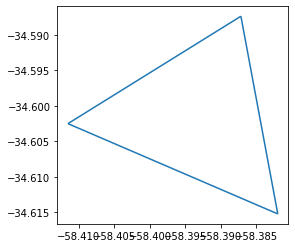

In [77]:
lin_des.plot();

Veamos en detalle los que estuvimos haciendo. Como se puede apreciar...

In [78]:
# Este es nuestro geodataframe,
lin_des['geometria']

0    LINESTRING (-58.38718 -34.58738, -58.41155 -34...
1    LINESTRING (-58.41155 -34.60251, -58.38198 -34...
2    LINESTRING (-58.38198 -34.61523, -58.38718 -34...
Name: geometria, dtype: geometry

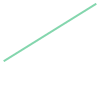

In [79]:
# tal como el objeto Point, así luce un LineString
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0]

In [80]:
# También posee un largo,
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].length

0.02868698435633323

In [81]:
# valor que está supeditado a la proyección que estemos utilizando. Nosotros no asignamos ninguno,
print(lin_des.crs)

None


In [82]:
# así que hagámoslo.
lin_des.crs = CRS(4326)

In [83]:
lin_des.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [84]:
# Y vemos las diferencias de unidades entre una
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].length

0.02868698435633323

In [85]:
# y otra preyección.
lin_des.to_crs(22183).loc[lin_des['id']=='C1024FDA']['geometria'][0].length

2812.5758808637142

In [86]:
# Como mencionamos previamente una línea posee un set de límites o puntos extremos.
list(lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].coords)

[(-58.38717819999999, -34.5873759), (-58.4115493, -34.6025084)]

In [87]:
# o simplemente pensémoslo como una sucesión de puntos 
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].coords[0]

(-58.38717819999999, -34.5873759)

In [88]:
# en la que puede haber más coordenadas que sólo las extremas si consideramos 'n' veces '.coords[n]'
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].coords[1]

(-58.4115493, -34.6025084)

In [89]:
# A los que también podemos acceder con el método xy
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].xy

(array('d', [-58.38717819999999, -58.4115493]),
 array('d', [-34.5873759, -34.6025084]))

Esto deja en claro que una `línea` también puede ser vista como una sucesión infinita de puntos.

In [90]:
# Otro atributo importante es su centroide. Este suele ser muy útil cuando querramos pasar de LineString a Point.
list(lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].centroid.coords)

[(-58.39936374999999, -34.594942149999994)]

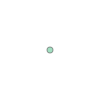

In [91]:
lin_des['geometria'][0].centroid

In [92]:
# como vemos, es un punto.
type(lin_des['geometria'][0].centroid)

shapely.geometry.point.Point

Veamos cómo pueden servirnos estos métodos y atributos que estuvimos revisando. Como dijimos, las líneas que construimos son una forma de representar la distancia aérea que separa a los desarrollos inmobiliarios entre sí. Asimismo, vimos que era posible construir tres líneas, sabiendo que la columna id representa el correo postal o dirección de salida de cada uno de esos recorridos. Pero lo que no sabemos, es con qué destino quedó unido. Es decir, sabemos que ir de `C1024FDA` a `C1171ABM` es lo mismo que ir de `C1171ABM` a `C1024FDA`. Por eso, para completar aún más nuestro geodataframe, intentemos agregar el punto de inicio y de fin de cada línea.

In [93]:
lin_des

,id,geometria
0,C1024FDA,"LINESTRING (-58.38718 -34.58738, -58.41155 -34..."
1,C1171ABM,"LINESTRING (-58.41155 -34.60251, -58.38198 -34..."
2,C1097AAX,"LINESTRING (-58.38198 -34.61523, -58.38718 -34..."


In [94]:
def destino(n):
    '''
    Identifica el código postal del punto del 
    extremo superior de la línea de distancia.
     ...
    Argumentos:
        n(int): índice de la geometría.
    Devuelve:
        str: código postal de destino
    '''    
    try:
        F = list(lin_des['geometria'][n].coords[1])
        I = list(lin_des['geometria'][n+1].coords[0])

        if F == I:
            destino = lin_des['id'][n+1]
            return destino
    except:
        F = list(lin_des['geometria'][n].coords[1])
        I = list(lin_des['geometria'][n-n].coords[0])

        if F == I:
            destino = lin_des['id'][n-n]
            return destino

In [95]:
destino(0)

'C1171ABM'

In [96]:
destinos = [destino(i) for i in range(len(lin_des))]

In [97]:
lin_des['destino'] = destinos

In [98]:
lin_des

,id,geometria,destino
0,C1024FDA,"LINESTRING (-58.38718 -34.58738, -58.41155 -34...",C1171ABM
1,C1171ABM,"LINESTRING (-58.41155 -34.60251, -58.38198 -34...",C1097AAX
2,C1097AAX,"LINESTRING (-58.38198 -34.61523, -58.38718 -34...",C1024FDA


In [99]:
# renombramos sus columnas
lin_des.rename(columns={'id':'origen'}, inplace=True)

In [100]:
# y le cambiamos el orden
lin_des = lin_des[['origen', 'destino', 'geometria']]

Calculemos ahora la distancia que existe entre cada par origen-destino. Es decir, la longitud de nuestras líneas. Vamos a utilizar la proyección del escenario donde estamos trabajando - el de la Ciudad de Buenos Aires, recordemos que compartimos el link con su información más arriba cuando abordamos los SRC -. 

Al respecto, vale aclarar que este se encuentra en metros. Existen otras proyecciones que también utilizan el mismo sistema de medida, por ejemplo la EPSG:3857. Esta es de alcance global y por ende suele ser de uso más generalizado. Pero como queremos ganar algo más de precisión vamos a utilizar la propia de nuestro caso de análisis (la proyección óptima depende depende de la ubicación en el globo).

In [101]:
# veamos el resultado en EPSG 3857
lin_des.to_crs(3857).geometria.apply(lambda x: x.length)

0    3398.216086
1    3714.102740
2    3811.138391
Name: geometria, dtype: float64

Como mencionamos anteriormente, una de las características de la nueva release de Geopandas es que enriquece el sistema de coordenadas con información adicional. Esta nueva forma de trabajar con [proyecciones](https://geopandas.org/projections.html) también permite manipular las dos representaciones más comunes de la nomenclatura EPSG:[proj4](https://spatialreference.org/ref/sr-org/7124/proj4/) y well known text o [WKT](https://spatialreference.org/ref/sr-org/7124/prettywkt/). Aquí disponibilizamos los de de la Ciudad de Buenos Aires, pero esta web es muy útil para consultar los de diversas parte del mundo (uno nunca sabe con qué parte del globo va a trabajar!).

In [102]:
# y la instanciamos en un string. En este caso no usamos un código EPSG
proj4 = '+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs' 

In [103]:
# definamos nuestro nuevo crs
proj4_bsas = pyproj.CRS(proj4)

In [104]:
# como dijimos, ahora es un objeto enriquecido
proj4_bsas

<Projected CRS: +proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on International 1909 (Hayford) ellipsoid
- Ellipsoid: International 1909 (Hayford)
- Prime Meridian: Greenwich

In [105]:
# con el método .source_crs, también podemos conocer un resumen de nuestro crs
proj4_bsas.source_crs

<Geographic 2D CRS: GEOGCRS["unknown",DATUM["Unknown based on Internat ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: Unknown based on International 1909 (Hayford) ellipsoid
- Ellipsoid: International 1909 (Hayford)
- Prime Meridian: Greenwich

In [106]:
# y conseguir su EPSG equivalente. En nuestro caso, el CRS de BsAs no posee esa nomenclatura.
print(proj4_bsas.to_epsg())

None


In [107]:
# Ahora, repliquemos lo mismo pero con el formato WKT.
wkt = """PROJCS["GKBA",
        GEOGCS["International 1909 (Hayford)",
            DATUM["CAI",
                SPHEROID["intl",6378388,297]],
            PRIMEM["Greenwich",0],
            UNIT["degree",0.0174532925199433]],
        PROJECTION["Transverse_Mercator"],
        PARAMETER["latitude_of_origin",-34.6297166],
        PARAMETER["central_meridian",-58.4627],
        PARAMETER["scale_factor",0.999998],
        PARAMETER["false_easting",100000],
        PARAMETER["false_northing",100000],
        UNIT["Meter",1]]"""

In [108]:
wkt_bsas = pyproj.CRS(wkt)

In [109]:
wkt_bsas.source_crs

<Geographic 2D CRS: GEOGCRS["International 1909 (Hayford)",DATUM["CAI" ...>
Name: International 1909 (Hayford)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: CAI
- Ellipsoid: intl
- Prime Meridian: Greenwich

In [110]:
print(wkt_bsas.to_epsg())

None


In [111]:
# Ahora, utilicemos la nueva proyeccion y calculemos cada recorrido respetando su unidad de referencia (metros)
lin_des.to_crs(proj4_bsas).geometria.apply(lambda x: x.length)

0    2795.877788
1    3057.330245
2    3126.557810
Name: geometria, dtype: float64

In [112]:
lin_des.to_crs(wkt_bsas).geometria.apply(lambda x: x.length)

0    2795.877766
1    3057.330220
2    3126.557779
Name: geometria, dtype: float64

Como se puede apreciar, el cálculo de distancia difiere levemente entre ambos sistemas de coordenadas. Ahora, creemos una columna de nuestro dataframe de líneas con su atributo de distancia.

In [113]:
lineas = lin_des.copy()
lineas['distancia'] = lineas.to_crs(wkt_bsas).geometria.apply(lambda x: x.length)

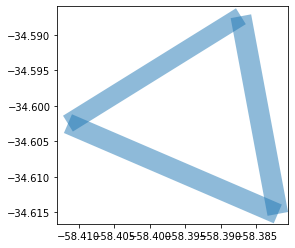

In [114]:
# Y veamos ahora dónde está el recorrido más largo. Se ve claramente que este es entre los CP 1024 y 1171
lineas.plot(linewidth = lineas.distancia/150,alpha = 0.5);

Pero,¿cómo haríamos si, en lugar de la distancia entre extremos (es decir, todo el largo de la línea), quisiéramos establecer la distancia entre un punto y otro siempre estando dentro del recorrido de la misma línea? Vayamos con otro ejemplo de un caso puntual...

In [115]:
def dist_en_linea(proj, linea, idx_a, idx_b):
    '''
    Calcula la distancia entre dos puntos 
    determinados de una línea
     ...
    Argumentos:
        proj(crs): Sistema de coordenadas de referencia 
        linea(int): Posición o nro de línea del gdf. 
        idx_a(int): Posición de la coordenada inicial.
        idx_b(int): Posición de la coordenada final.
    Devuelve:
        float: distancia lineal
    '''    
    gse= lineas.to_crs(proj)['geometria']
    A=Point(gse[linea].coords[idx_a])
    B=Point(gse[linea].coords[idx_b])
    
    return A.distance(B)

In [116]:
# aca tenemos la distancia en metros entre las coordenadas 0 y 1 de la primer línea de nuestro gdf
dist_en_linea(proj4_bsas, 0, 0, 1)

2795.877788359215

En el caso de haber tenido una mayor cantidad de coordenadas (o una línea compuesta por múltiples puntos), la función anterior nos hubiese permitido indexar más allá de 0 y 1 (que son el inicio y el fin de la línea). Suponiendo que hubiese tenido un punto intermedio, hubiese sido posible medir la distancia entre 0 y 1 como así también entre 1 y 2. Pero nuestra línea sólo tiene un par de coordenadas. 

Con esto, introducimos un nuevo concepto: el `sistema de referencia lineal` o `linear reference system`. Este nos habría permitido conocer cosas útiles como... 

In [117]:
# a qué distancia sobre la línea se encuentra cada punto.
inicio = lineas.to_crs(proj4_bsas)['geometria'][0].coords[0]
fin =  lineas.to_crs(proj4_bsas)['geometria'][0].coords[1]

In [118]:
# Esto, con el método project. 
lineas.to_crs(proj4_bsas)['geometria'][0].project(Point(fin))

2795.877788359215

In [119]:
# Con el parámetro normalized también podemos ver qué porcentage de la línea representa la distancia de ese punto
lineas.to_crs(proj4_bsas)['geometria'][0].project(Point(fin), normalized=True)

1.0

In [120]:
# O bien qué coordenadas corresponden a cierta distancia sobre la línea
distancia = lineas.to_crs(proj4_bsas)['geometria'][0].project(Point(fin))
print(lin_des.to_crs(proj4_bsas)['geometria'][0].interpolate(distancia))

POINT (104747.1574624284 102967.4982134432)


Este conjunto de métodos resultan altamente útiles cuando trabajamos sobre la misma línea. Como vimos con las coordenadas del caso anterior, un indicador que hubiesemos podido construir es la distancia en línea recta al 100% de su recorrido. También, agregando algunas coordenadas intermedias más tendríamos la posibilidad de conocer la distancia al 25, 50 o bien el 75% de su recorrido. Esto, por mencionar sólo un ejemplo.

> **3. Polígonos**

Antes de hablar estrictamente de la clase `Polygon`, haremos una breve mención a la clase `LinearRing`. Como dijimos anteriormente esta era una de las clases con las que se implementaban las líneas. Ahora bien, ¿por qué la mencionamos en esta sección? Una linea con el mismo punto de inicio y fin no es un `LineString` pero tampoco es un `Polygon`. Ahora bien, la clase [LinearRing](https://shapely.readthedocs.io/en/latest/manual.html#LinearRing) representa uno de los atributos principales de un polígono: su borde. Por eso es que ambas clases se encuentran estrechamente vnculadas. Un polígono es una superficie circunscripta a un límite. Por ende, es posible pasar de una a otra con cierta facilidad. Fijémosno cómo...

In [121]:
from shapely.geometry import LinearRing

In [122]:
# construyamos un anillo de ejemplo tomando como referencia nuestras coordenadas de distancia
anillo = LinearRing([lineas['geometria'][0].coords[0], 
                     lineas['geometria'][1].coords[0], 
                     lineas['geometria'][2].coords[0]])

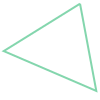

In [123]:
anillo

In [124]:
type(anillo)

shapely.geometry.polygon.LinearRing

In [125]:
anillo.is_ring

True

In [126]:
anillo.area

0.0

In [127]:
# este es, tal vez, el atributo más importante: su largo
anillo.length

0.08921028595517894

In [128]:
from shapely.geometry import Polygon

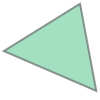

In [129]:
# Ahora pasemos de un LinearRing a un Polygon
Polygon(anillo)

Volviendo a la clase `Polygon`, el [modelo de datos espaciales](https://shapely.readthedocs.io/en/latest/manual.html#spatial-data-model) de shapely lo define como una superficie compuesta por un conjunto interior de infinitos puntos delimitado por una o más curvas y un conjunto exterior de infitos puntos. Esta geometría tiene una dimensión topológica de 2. [Acá](https://automating-gis-processes.github.io/site/2018/notebooks/L1/geometric-objects.html) dejamos una descripción más detalladas de todos los objetos geométricos de shapely.

Levantemos un geodataframe de polígonos y veamos qué características y métodos tienen...

In [130]:
# trabajemos con un shape de barrios
barrios = gpd.read_file('../carto/barrios_badata.shp')

In [131]:
barrios.head()

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"POLYGON ((100961.338 103691.974, 100884.721 10..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"POLYGON ((99791.104 103628.888, 99787.132 1036..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"POLYGON ((103627.714 103487.358, 103517.533 10..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"POLYGON ((97128.440 101597.513, 97112.315 1015..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"POLYGON ((104625.143 101679.935, 104629.994 10..."


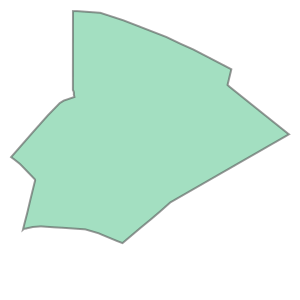

In [132]:
# así luce el barrio de Chacarita
barrios.geometry[0]

In [133]:
# Como dijimos, un polígono está compuesto por una superficie interna o área
print('El barrio de Chacarita tiene una superficie de %r m2' % int(barrios.geometry[0].area))

El barrio de Chacarita tiene una superficie de 3115707 m2


In [134]:
# el shape de barrios con el que estamos trabajando ya se encuentra proyectado en Transverse Mercator
int(barrios.to_crs(proj4_bsas).geometry[0].area)

3115707

In [135]:
# se puede ver que el mismo ya se encuentra en metros, por lo que no es necesario reproyectarlo..
barrios.crs

<Projected CRS: PROJCS["Argentina_GKBsAs",GEOGCS["GCS_Campo_Inchau ...>
Name: Argentina_GKBsAs
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Campo Inchauspe
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [136]:
# Un polígono también tiene un límite exterior - o un LinearRing -,  
type(barrios.geometry[0].exterior)

shapely.geometry.polygon.LinearRing

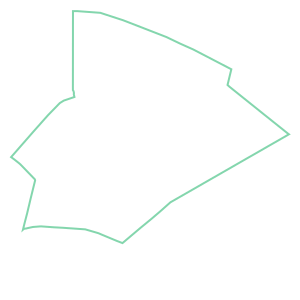

In [137]:
barrios.geometry[0].exterior

In [138]:
# que como dijimos cuenta con una extensión o largo determinada - su perímetro.
barrios.geometry[0].exterior.length

7724.8529545663605

In [139]:
# Un polígono también tiene un interior (o islas)
barrios.interiors

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                                                    []
9                                                    []
10                                                   []
11                                                   []
12                                                   []
13                                                   []
14                                                   []
15                                                   []
16                                                   []
17                                              

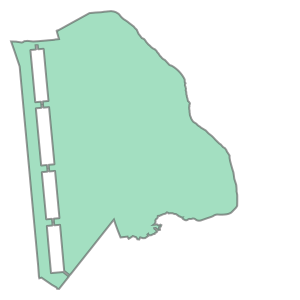

In [140]:
# veamos cómo se ve ese polígono (que no es más que un polígono con LinearRings en su interior)
barrios.geometry[40]

Para terminar con esta práctica, veamos de qué manera se pueden relacionar las tres geometrías que hemos visto. Para ello introduciremos un método muy útil, el [join espacial](https://geopandas.org/reference/geopandas.sjoin.html) de `geopandas`. Este método nos va a permitir ver, en primera instancia, en qué barrio cae cada uno de los desarrollos inmobiliarios que hemos creado.

In [141]:
# importamos el método join espacial
from geopandas import sjoin 

In [142]:
# recuperamos nuestro shape de puntos
puntos = gda_completo.to_crs(barrios.crs).loc[gda_completo.inicia==2021]

In [143]:
# este método no nos concatena los geodataframes. También nos devuelve el índice del objeto unido
gpd.sjoin(puntos, barrios)

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,latitud,longitud,geometry,index_right,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
1,C1024FDA,2021,2022,32,5,11,1,1,10,4,-34.587376,-58.387178,POINT (106983.680 104644.865),44,RECOLETA,2.0,21452.838648,6.317265e+06,BARRIO
3,C1171ABM,2021,2022,41,1,14,2,4,6,14,-34.602508,-58.411549,POINT (104746.926 102967.572),24,BALVANERA,3.0,8375.821811,4.342280e+06,BARRIO
5,C1097AAX,2021,2022,43,4,3,2,12,7,15,-34.615230,-58.381981,POINT (107458.012 101554.571),41,MONSERRAT,1.0,6739.222311,2.198622e+06,BARRIO


In [144]:
# instanciamos nuestro gdf de puntos con su etiqueta de barrios
ptos_barrio = gpd.sjoin(puntos, barrios)

In [145]:
# utilizamos el right index para filtrar los barrios en lo que cae cada punto
[barrios.index[i] for i in ptos_barrio['index_right']]

[44, 24, 41]

In [146]:
# usamos esa lista para indexar nuestro gdf de barrios
barrios.loc[[barrios.index[i] for i in ptos_barrio['index_right']]]

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
44,RECOLETA,2.0,21452.838648,6.317265e+06,BARRIO,"POLYGON ((107643.458 106569.299, 107641.492 10..."
24,BALVANERA,3.0,8375.821811,4.342280e+06,BARRIO,"POLYGON ((104713.283 103467.380, 104862.315 10..."
41,MONSERRAT,1.0,6739.222311,2.198622e+06,BARRIO,"POLYGON ((108667.802 102485.741, 108727.534 10..."


In [147]:
# guardamos nuestros barrios filtrados
barrios_filtro = barrios.loc[[barrios.index[i] for i in ptos_barrio['index_right']]]

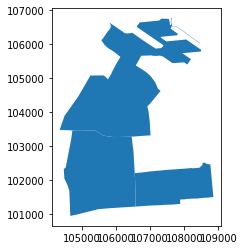

In [148]:
barrios_filtro.plot();

En esta práctica no vamos a profundizar en visualizaciones, pero adelantemonos a lo que sigue previsualizando cómo quedarían nuestros desarrollos en un contexto un poco más completo. Para ello, visualicemos dónde se localizan...

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

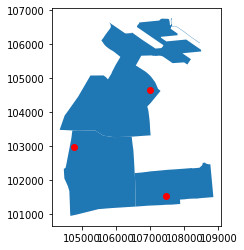

In [150]:
# creamos la figura y el eje y ploteamos
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
barrios_filtro.plot(ax=ax)
ptos_barrio.plot(ax=ax, color='red');

Y ahora veamos cómo quedaría nuestro mapa de desarrollos si quisiéramos graduar nuestro gdf de puntos en función de la cantidad de departamos por tamaño. Así, veremos la representación de cada desarrollo graduado en calidad del porcentaje de unidades funcionales según ambientes. Veamos el ejemplo...

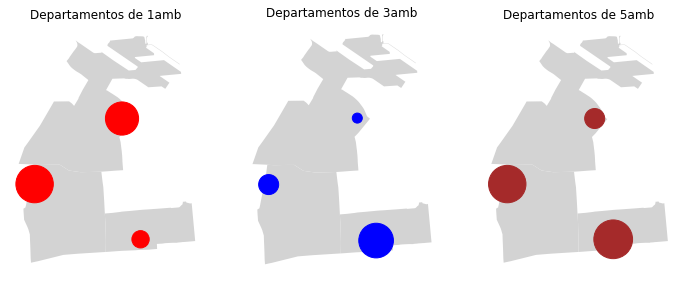

In [151]:
# Seteamos las figuras,
fig = plt.figure(figsize=(12,7))

# los ejes y ploteamos cada par de puntos/polígonos
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# axis 1
barrios_filtro.plot(ax=ax1,
                    color='lightgrey')
ptos_barrio.plot(ax=ax1, 
                 color = 'red',
                 markersize=ptos_barrio['1_amb']*100)
ax1.set_axis_off()
ax1.set_title('Departamentos de 1amb')

# axis 2
barrios_filtro.plot(ax=ax2,
                   color='lightgrey')
ptos_barrio.plot(ax=ax2, 
                 color = 'blue',
                 markersize=ptos_barrio['3_amb']*100)
ax2.set_axis_off()
ax2.set_title('Departamentos de 3amb')

# axis 3
barrios_filtro.plot(ax=ax3,
                   color='lightgrey')
ptos_barrio.plot(ax=ax3, 
                 color = 'brown',
                 markersize=ptos_barrio['5_amb']*100)
ax3.set_axis_off()
ax3.set_title('Departamentos de 5amb');

Por último, incorporemos nuestro análisis de distancias. Para eso, volvamos a construir un gdf de líneas a partir del de puntos con el que ploteamos antes.

In [152]:
def point_to_line(gdf,idx):
    '''
    Convierte una Point geometry en LineString
    a partir de un set de coordenadas de inicio y fin.
     ...
    Argumentos:
        gdf(gdf): GeoDataFrame de puntos 
        idx(int): Posición de cada geometría dentro del gdf. 
    Devuelve:
        LineString
    '''    
    x_inicio = gdf.iloc[idx].geometry.x
    y_inicio = gdf.iloc[idx].geometry.y
    
    try:
        x_fin = gdf.iloc[idx+1].geometry.x
        y_fin = gdf.iloc[idx+1].geometry.y
    except:
        x_fin = gdf.iloc[idx-idx].geometry.x
        y_fin = gdf.iloc[idx-idx].geometry.y
    
    I = (x_inicio, y_inicio)
    F = (x_fin, y_fin)
    
    new_geometry = LineString([I,F])
    return new_geometry

In [153]:
# Instanciamos las nuevas geometrías,
distancias = [point_to_line(ptos_barrio,i) for i in range(len(ptos_barrio))]

In [154]:
# hacemos una copia de nuestro gdf de puntos 
dist_barrio = ptos_barrio.copy()

In [155]:
# y pisamos la geometría de puntos con la de lineas. Ahora tenemos el recorrido aéreo entre cada punto
dist_barrio.geometry = distancias

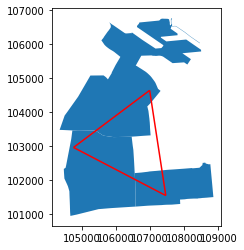

In [156]:
# Vemos cómo queda rápidamente...
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
barrios_filtro.plot(ax=ax)
dist_barrio.plot(ax=ax, color='red');

In [157]:
# Creamos el atributo de distancia con 'lenght'
dist_barrio['distancia'] = dist_barrio.geometry.length

A continuación, retomamos el código del último plot pero agregando el atributo de distancias aéreas. Reparemos en cómo se agregan los 4 subplots para cada mapa.

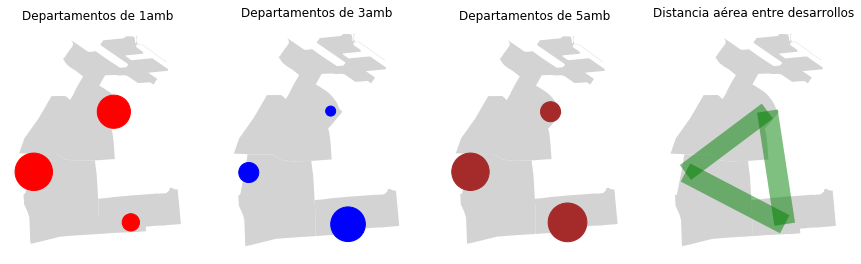

In [158]:
# Figuras y ejes,
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

# axis 1
barrios_filtro.plot(ax=ax1,
                    color='lightgrey')
ptos_barrio.plot(ax=ax1, 
                 color = 'red',
                 markersize=ptos_barrio['1_amb']*100)
ax1.set_axis_off()
ax1.set_title('Departamentos de 1amb')

# axis 2
barrios_filtro.plot(ax=ax2,
                   color='lightgrey')
ptos_barrio.plot(ax=ax2, 
                 color = 'blue',
                 markersize=ptos_barrio['3_amb']*100)
ax2.set_axis_off()
ax2.set_title('Departamentos de 3amb')

# axis 3
barrios_filtro.plot(ax=ax3,
                   color='lightgrey')
ptos_barrio.plot(ax=ax3, 
                 color = 'brown',
                 markersize=ptos_barrio['5_amb']*100)
ax3.set_axis_off()
ax3.set_title('Departamentos de 5amb')

# axis 4
barrios_filtro.plot(ax=ax4,
                   color='lightgrey')
dist_barrio.plot(ax=ax4, 
                 color = 'green',
                 linewidth = dist_barrio.distancia/150,alpha = 0.5,
                 legend=True)
ax4.set_axis_off()
ax4.set_title('Distancia aérea entre desarrollos');

Y si quisiéramos brindar algún tipo de información adicional, también se podrían agregar las leyendas. Como sugerencia, es importante considerar que lo que queremos comunicar tiene un sentido. Por ejemplo, si estamos graduando puntos o líneas es recomendable usar [cmap](https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html) secuenciales. Otro caso, podría ser el ploteo de información diferenciada en categorías. Para estas situaciones, es mejor otro tipo de paletas. Como por ejemplo los `qualitative colormaps`.

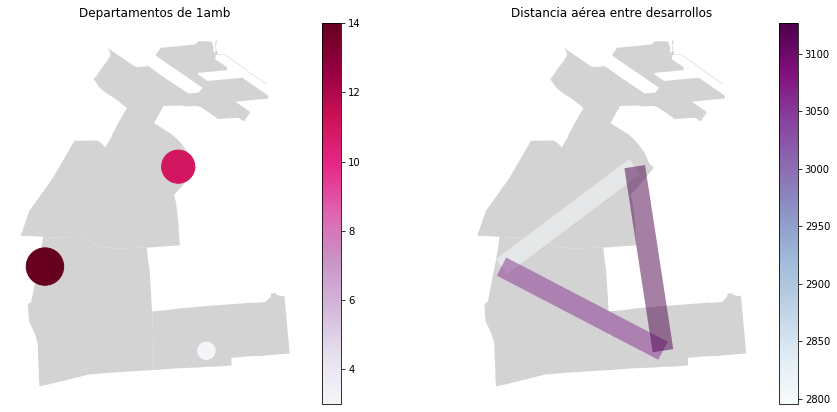

In [159]:
# Figuras y ejes, cambiamos el tamaño para plotear mejor las leyendas
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


# axis 1
barrios_filtro.plot(ax=ax1,
                    color='lightgrey')
ptos_barrio.plot(ax=ax1, 
                 column = '1_amb',
                 legend=True,
                 cmap='PuRd',
                 markersize=ptos_barrio['1_amb']*100)
ax1.set_axis_off()
ax1.set_title('Departamentos de 1amb')


# axis 2
barrios_filtro.plot(ax=ax2,
                   color='lightgrey')
dist_barrio.plot(ax=ax2, 
                 column = 'distancia',
                 legend=True,
                 cmap='BuPu',
                 linewidth = dist_barrio.distancia/150,alpha = 0.5,
                 )
ax2.set_axis_off()
ax2.set_title('Distancia aérea entre desarrollos');